In [3]:
#####import all library ######
import sys as sy
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib as mpl
import numpy as np
import scipy as sp
#####imported librabries######



from IPython.display import display, HTML
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, cohen_kappa_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import make_pipeline as make_pipeline_imb # To do our transformation in a unique time
from imblearn.metrics import classification_report_imbalanced
from collections import Counter
from sklearn.metrics import precision_score, recall_score, f1_score,fbeta_score, confusion_matrix, precision_recall_curve, accuracy_score



In [4]:
#Loading data from the csv to df
df = pd.read_csv('creditcard.csv')
##deination of scaling
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)
#scaling the amount column
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

#concatenating newly created columns w original df
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.sample(5)

#dropping old amount and time columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)
print(df.head())
display(HTML(df.head(5).to_html()))

         V1        V2        V3        V4        V5        V6        V7  \
0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
1  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
2 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
3 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
4 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.260314 -0.568671 -0.371407  ... -0.559825 -0.026398 -0.371427 -0.232794   
1  0.081213  0.464960 -0.099254  ... -0.270710 -0.154104 -0.780055  0.750137   
2 -3.807864  0.615375  1.249376  ... -1.015455  0.057504 -0.649709 -0.415267   
3  0.851084 -0.392048 -0.410430  ... -0.268092 -0.204233  1.011592  0.373205   
4  0.069539 -0.736727 -0.366846  ... -0.633753 -0.120794 -0.385050 -0.069733   

        V26       V27       V28  Class  scaled_amount  scaled_time  

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0,-0.338550,-1.996628
1,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,0,-0.333273,-1.996586
2,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0,-0.190102,-1.996523
3,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0,0.019396,-1.996523
4,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,0,-0.338510,-1.996481


In [5]:
##Initializing frauds and valid count as 0 and 1
class_names = {0:'Not Fraud', 1:'Fraud'}

#separting the fraud and non fraud cases
Fraud=df[df['Class']==1] #X
print(Fraud.shape)
Valid=df[df['Class']==0] #Y
print(Valid.shape)

(492, 31)
(284310, 31)


In [6]:
###Equal number folds for Fraud
split_dataframe = np.split(Fraud,6)
f1 = split_dataframe[0].reset_index(drop=True)
f2 = split_dataframe[1].reset_index(drop=True)
f3 = split_dataframe[2].reset_index(drop=True)
f4 = split_dataframe[3].reset_index(drop=True)
f5 = split_dataframe[4].reset_index(drop=True)
f6 = split_dataframe[5].reset_index(drop=True)

In [7]:
##Equal number folds for Valid atat
split_dataframe = np.split(Valid,6)
v1 = split_dataframe[0].reset_index(drop=True)
v2 = split_dataframe[1].reset_index(drop=True)
v3 = split_dataframe[2].reset_index(drop=True)
v4 = split_dataframe[3].reset_index(drop=True)
v5 = split_dataframe[4].reset_index(drop=True)
v6 = split_dataframe[5].reset_index(drop=True)

In [8]:
### test 6 Rounds by merging data
r1_test=pd.concat([f1,v1])
r1_test = r1_test.sample(frac=1).reset_index(drop=True)
r2_test=pd.concat([f2,v2])
r2_test = r2_test.sample(frac=1).reset_index(drop=True)
r3_test=pd.concat([f3,v3])
r3_test = r3_test.sample(frac=1).reset_index(drop=True)
r4_test=pd.concat([f4,v4])
r4_test = r4_test.sample(frac=1).reset_index(drop=True)
r5_test=pd.concat([f5,v5])
r5_test = r5_test.sample(frac=1).reset_index(drop=True)
r6_test=pd.concat([f6,v6])
r6_test = r6_test.sample(frac=1).reset_index(drop=True)

In [9]:
###Train 6 round by merging data
r1_train=pd.concat([f2,f3,f4,f5,f6,v2,v3,v4,v5,v6])
r1_train = r1_train.sample(frac=1).reset_index(drop=True)
r2_train=pd.concat([f1,f3,f4,f5,f6,v1,v3,v4,v5,v6])
r2_train = r2_train.sample(frac=1).reset_index(drop=True)
r3_train=pd.concat([f1,f2,f4,f5,f6,v1,v2,v4,v5,v6])
r3_train = r3_train.sample(frac=1).reset_index(drop=True)
r4_train=pd.concat([f1,f3,f2,f5,f6,v1,v3,v2,v5,v6])
r4_train = r4_train.sample(frac=1).reset_index(drop=True)
r5_train=pd.concat([f1,f3,f4,f2,f6,v1,v3,v4,v2,v6])
r5_train = r5_train.sample(frac=1).reset_index(drop=True)
r6_train=pd.concat([f1,f3,f4,f5,f2,v1,v3,v4,v5,v2])
r6_train = r6_train.sample(frac=1).reset_index(drop=True)

236925
236925


C:\Users\priya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


precision:  0.017168449863150036
recall:  0.8414634146341463
f1-score:  0.033650329188002925
Accuracy:  0.9165104177639202
Confusion Matrix :
[[43435  3950]
 [   13    69]]
Accuracy Score : 0.9165104177639202
Report : 


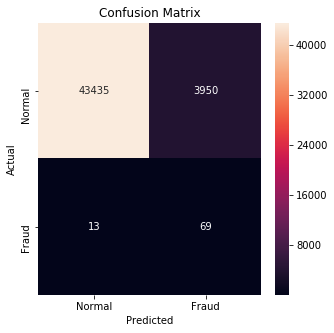

[0.9165104177639202]
[0.017168449863150036]
[0.8414634146341463]
[0.033650329188002925]


In [10]:
##Create list for conacatenate results of accuracy,precision,recall and f1-score
list1=[] #for average
list2=[] #for precision
list3=[] #for recall
list4=[] #f1-score
list1.clear()
list2.clear()
list3.clear()
list4.clear()
###Logistic regression for round 1 
r1_train_m1=r1_train.copy(deep=True)
X1_train=r1_train_m1.drop(["Class"], axis=1).values #Setting the X to do the split
y1_train=r1_train_m1["Class"].values
#Applying smote on train function for balancing the data
smt = SMOTE()
X1_train, y1_train = smt.fit_sample(X1_train, y1_train)
print(np.count_nonzero(y1_train== 0))
print(np.count_nonzero(y1_train== 1))


###Logistic model fold 1
lr = LogisticRegression()
lr.fit(X1_train, y1_train)

r1_test_m1=r1_test.copy(deep=True)
x1_test=r1_test_m1.drop(["Class"], axis=1).values #Setting the X to do the split
y1_test=r1_test_m1["Class"].values
y_pred = lr.predict(x1_test)
###Accuracy for the fold 1



#Evaluation metrics
prec= precision_score(y1_test,y_pred)
print("precision: ",prec)
list2.append(prec)
rec= recall_score(y1_test,y_pred)
print("recall: ", rec)
list3.append(rec)
f1= f1_score(y1_test,y_pred)
print("f1-score: ",f1)
list4.append(f1)
a=accuracy_score(y1_test, y_pred)
print("Accuracy: ",a)
list1.append(a)

#printing confusion matrix
results = confusion_matrix(y1_test, lr.predict(x1_test)) 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y1_test, lr.predict(x1_test)) )
print ('Report : ')


                    


#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
plt.figure(figsize=(5, 5))
sns.heatmap(results, xticklabels=LABELS,yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(list1)
print(list2)
print(list3)
print(list4)


236925
236925


C:\Users\priya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


precision:  0.07149758454106281
recall:  0.9024390243902439
f1-score:  0.1324977618621307
Accuracy:  0.9795858175153265
Confusion Matrix :
[[46424   961]
 [    8    74]]
Accuracy Score : 0.9795858175153265
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     47385
           1       0.07      0.90      0.13        82

    accuracy                           0.98     47467
   macro avg       0.54      0.94      0.56     47467
weighted avg       1.00      0.98      0.99     47467



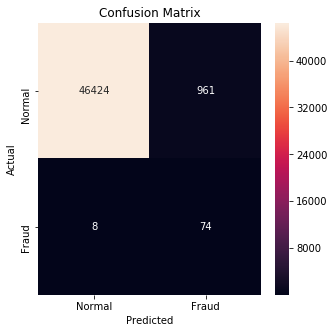

[0.9165104177639202, 0.9795858175153265]
[0.017168449863150036, 0.07149758454106281]
[0.8414634146341463, 0.9024390243902439]
[0.033650329188002925, 0.1324977618621307]


In [11]:
####Logistic Regression fold 2
r2_train_m1=r2_train.copy(deep=True)
X2_train=r2_train_m1.drop(["Class"], axis=1).values #Setting the X to do the split
y2_train=r2_train_m1["Class"].values
###SMote function on train function
smt = SMOTE()
X2_train, y2_train = smt.fit_sample(X2_train, y2_train)
print(np.count_nonzero(y2_train== 0))
print(np.count_nonzero(y2_train== 1))

###Logistic regression model fold 2
lr = LogisticRegression()
lr.fit(X2_train, y2_train)

r2_test_m1=r2_test.copy(deep=True)
x2_test=r2_test_m1.drop(["Class"], axis=1).values #Setting the X to do the split
y2_test=r2_test_m1["Class"].values
y2_pred = lr.predict(x2_test)

##Accuracy of the fold 2


#Evaluation metrics
prec= precision_score(y2_test,y2_pred)
print("precision: ",prec)
list2.append(prec)
rec= recall_score(y2_test,y2_pred)
print("recall: ", rec)
list3.append(rec)
f1= f1_score(y2_test,y2_pred)
print("f1-score: ",f1)
list4.append(f1)
b=accuracy_score(y2_test, y2_pred)
print("Accuracy: ",b)
list1.append(b)

#printing confusion matrix
results = confusion_matrix(y2_test, lr.predict(x2_test)) 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y2_test, lr.predict(x2_test)) )
print(classification_report(y2_test, lr.predict(x2_test)))

#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
plt.figure(figsize=(5, 5))
sns.heatmap(results, xticklabels=LABELS,yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


print(list1)
print(list2)
print(list3)
print(list4)


236925
236925


C:\Users\priya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


precision:  0.0888030888030888
recall:  0.8414634146341463
f1-score:  0.16065192083818394
Accuracy:  0.9848104999262646
Confusion Matrix :
[[46677   708]
 [   13    69]]
Accuracy Score : 0.9848104999262646
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     47385
           1       0.09      0.84      0.16        82

    accuracy                           0.98     47467
   macro avg       0.54      0.91      0.58     47467
weighted avg       1.00      0.98      0.99     47467



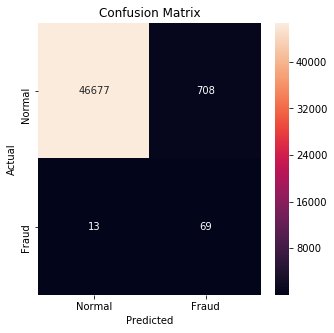

0.9848104999262646
[0.9165104177639202, 0.9795858175153265, 0.9848104999262646]
[0.017168449863150036, 0.07149758454106281, 0.0888030888030888]
[0.8414634146341463, 0.9024390243902439, 0.8414634146341463]
[0.033650329188002925, 0.1324977618621307, 0.16065192083818394]


In [12]:
#Logistic regression Fold 3
r3_train_m1=r3_train.copy(deep=True)
X3_train=r3_train_m1.drop(["Class"], axis=1).values #Setting the X to do the split
y3_train=r3_train_m1["Class"].values
##Smote function on train data 
smt = SMOTE()
X3_train, y3_train = smt.fit_sample(X3_train, y3_train)
print(np.count_nonzero(y3_train== 0))
print(np.count_nonzero(y3_train== 1))

###Logistic Regression Fold 3

lr = LogisticRegression()
lr.fit(X3_train, y3_train)

r3_test_m1=r3_test.copy(deep=True)
x3_test=r3_test_m1.drop(["Class"], axis=1).values #Setting the X to do the split
y3_test=r3_test_m1["Class"].values
y3_pred = lr.predict(x3_test)
###Accuracy of the fold 3


#Evaluation metrics
prec= precision_score(y3_test,y3_pred)
print("precision: ",prec)
list2.append(prec)
rec= recall_score(y3_test,y3_pred)
print("recall: ", rec)
list3.append(rec)
f1= f1_score(y3_test,y3_pred)
print("f1-score: ",f1)
list4.append(f1)
c=accuracy_score(y3_test, y3_pred)
list1.append(c)
print("Accuracy: ",c)

#printing confusion matrix
results = confusion_matrix(y3_test, lr.predict(x3_test)) 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y3_test, lr.predict(x3_test)) )
print(classification_report(y3_test, lr.predict(x3_test)))

#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
plt.figure(figsize=(5, 5))
sns.heatmap(results, xticklabels=LABELS,yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print(c)

print(list1)
print(list2)
print(list3)
print(list4)


236925
236925


C:\Users\priya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


precision:  0.03730272596843615
recall:  0.9512195121951219
f1-score:  0.07179015186378278
Accuracy:  0.9575073208755557
Confusion Matrix :
[[45372  2013]
 [    4    78]]
Accuracy Score : 0.9575073208755557
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     47385
           1       0.04      0.95      0.07        82

    accuracy                           0.96     47467
   macro avg       0.52      0.95      0.53     47467
weighted avg       1.00      0.96      0.98     47467



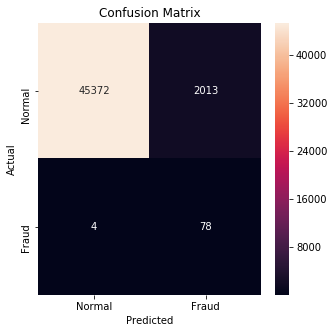

0.9575073208755557
[0.9165104177639202, 0.9795858175153265, 0.9848104999262646]
[0.017168449863150036, 0.07149758454106281, 0.0888030888030888, 0.03730272596843615]
[0.8414634146341463, 0.9024390243902439, 0.8414634146341463, 0.9512195121951219]
[0.033650329188002925, 0.1324977618621307, 0.16065192083818394, 0.07179015186378278, 0.9575073208755557]


In [13]:
###Logistic Regression of the FOld 4
r4_train_m1=r4_train.copy(deep=True)
X4_train=r4_train_m1.drop(["Class"], axis=1).values #Setting the X to do the split
y4_train=r4_train_m1["Class"].values

###Smote function on train data
smt = SMOTE()
X4_train, y4_train = smt.fit_sample(X4_train, y4_train)
print(np.count_nonzero(y4_train== 0))
print(np.count_nonzero(y4_train== 1))

###Logistic regression model fold 4
lr = LogisticRegression()
lr.fit(X4_train, y4_train)
r4_test_m1=r4_test.copy(deep=True)
x4_test=r4_test_m1.drop(["Class"], axis=1).values #Setting the X to do the split
y4_test=r4_test_m1["Class"].values
y4_pred = lr.predict(x4_test)
##Accuracy of Fold 4
#d=accuracy_score(y4_test, y4_pred)
#print("accuracy for the model is: ",d)
#list(d)

#Evaluation metrics
prec= precision_score(y4_test,y4_pred)
print("precision: ",prec)
list2.append(prec)
rec= recall_score(y4_test,y4_pred)
print("recall: ", rec)
list3.append(rec)
f1= f1_score(y4_test,y4_pred)
print("f1-score: ",f1)
list4.append(f1)
d=accuracy_score(y4_test, y4_pred)
print("Accuracy: ",d)
list4.append(d)


#printing confusion matrix
results = confusion_matrix(y4_test, lr.predict(x4_test)) 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y4_test, lr.predict(x4_test)) )
print(classification_report(y4_test, lr.predict(x4_test)))

#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
plt.figure(figsize=(5, 5))
sns.heatmap(results, xticklabels=LABELS,yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print(d)

print(list1)
print(list2)
print(list3)
print(list4)

236925
236925


C:\Users\priya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


precision:  0.06181202370872142
recall:  0.8902439024390244
f1-score:  0.11559778305621536
Accuracy:  0.9764678618829924
Confusion Matrix :
[[46277  1108]
 [    9    73]]
Accuracy Score : 0.9764678618829924
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     47385
           1       0.06      0.89      0.12        82

    accuracy                           0.98     47467
   macro avg       0.53      0.93      0.55     47467
weighted avg       1.00      0.98      0.99     47467



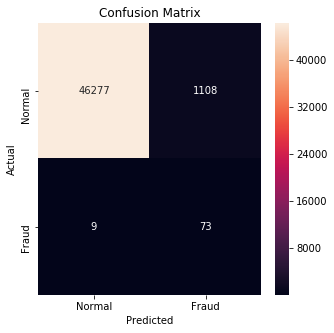

[0.9165104177639202, 0.9795858175153265, 0.9848104999262646, 0.9764678618829924]
[0.017168449863150036, 0.07149758454106281, 0.0888030888030888, 0.03730272596843615, 0.06181202370872142]
[0.8414634146341463, 0.9024390243902439, 0.8414634146341463, 0.9512195121951219, 0.8902439024390244]
[0.033650329188002925, 0.1324977618621307, 0.16065192083818394, 0.07179015186378278, 0.9575073208755557, 0.11559778305621536]


In [14]:
#Logistic regression of fold 5
r5_train_m1=r5_train.copy(deep=True)
X5_train=r5_train_m1.drop(["Class"], axis=1).values #Setting the X to do the split
y5_train=r5_train_m1["Class"].values

###Smote function on train data
smt = SMOTE()
X5_train, y5_train = smt.fit_sample(X5_train, y5_train)
print(np.count_nonzero(y5_train== 0))
print(np.count_nonzero(y5_train== 1))

##Logistic model fold 5
lr = LogisticRegression()
lr.fit(X5_train, y5_train)

r5_test_m1=r5_test.copy(deep=True)
x5_test=r5_test_m1.drop(["Class"], axis=1).values #Setting the X to do the split
y5_test=r5_test_m1["Class"].values
y5_pred = lr.predict(x5_test)



#Evaluation metrics
prec= precision_score(y5_test,y5_pred)
print("precision: ",prec)
list2.append(prec)
rec= recall_score(y5_test,y5_pred)
print("recall: ", rec)
list3.append(rec)
f1= f1_score(y5_test,y5_pred)
print("f1-score: ",f1)
list4.append(f1)
e=accuracy_score(y5_test, y5_pred)
print("Accuracy: ",e)
list1.append(e)

#printing confusion matrix
results = confusion_matrix(y5_test, lr.predict(x5_test)) 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y5_test, lr.predict(x5_test)) )
print(classification_report(y5_test, lr.predict(x5_test)))

#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
plt.figure(figsize=(5, 5))
sns.heatmap(results, xticklabels=LABELS,yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(list1)
print(list2)
print(list3)
print(list4)

236925
236925


C:\Users\priya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


precision:  0.1056547619047619
recall:  0.8658536585365854
f1-score:  0.18832891246684352
Accuracy:  0.987106832114943
Confusion Matrix :
[[46784   601]
 [   11    71]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     47385
           1       0.11      0.87      0.19        82

    accuracy                           0.99     47467
   macro avg       0.55      0.93      0.59     47467
weighted avg       1.00      0.99      0.99     47467



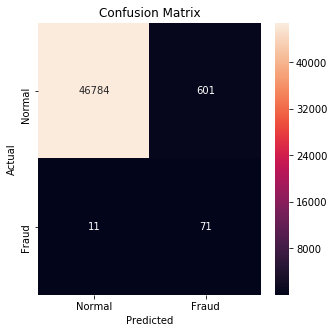

[0.9165104177639202, 0.9795858175153265, 0.9848104999262646, 0.9764678618829924, 0.987106832114943]
[0.017168449863150036, 0.07149758454106281, 0.0888030888030888, 0.03730272596843615, 0.06181202370872142, 0.1056547619047619]
[0.8414634146341463, 0.9024390243902439, 0.8414634146341463, 0.9512195121951219, 0.8902439024390244, 0.8658536585365854]
[0.033650329188002925, 0.1324977618621307, 0.16065192083818394, 0.07179015186378278, 0.9575073208755557, 0.11559778305621536, 0.18832891246684352]


In [15]:
###Logistic regression of fold 6
r6_train_m1=r6_train.copy(deep=True)
X6_train=r6_train_m1.drop(["Class"], axis=1).values #Setting the X to do the split
y6_train=r6_train_m1["Class"].values

###Smote function on the train function
smt = SMOTE()
X6_train, y6_train = smt.fit_sample(X6_train, y6_train)
print(np.count_nonzero(y6_train== 0))
print(np.count_nonzero(y6_train== 1))

##Logistic Regression on fold 6
lr = LogisticRegression()
lr.fit(X6_train, y6_train)

r6_test_m1=r6_test.copy(deep=True)
x6_test=r6_test_m1.drop(["Class"], axis=1).values #Setting the X to do the split
y6_test=r6_test_m1["Class"].values
y6_pred = lr.predict(x6_test)


#Evaluation metrics
prec= precision_score(y6_test,y6_pred)
print("precision: ",prec)
list2.append(prec)
rec= recall_score(y6_test,y6_pred)
print("recall: ", rec)
list3.append(rec)
f1= f1_score(y6_test,y6_pred)
print("f1-score: ",f1)
list4.append(f1)
f=accuracy_score(y6_test, y6_pred)
print("Accuracy: ",f)
list1.append(f)

#printing confusion matrix
results = confusion_matrix(y6_test, lr.predict(x6_test)) 
print ('Confusion Matrix :')
print(results) 
print((classification_report(y6_test, lr.predict(x6_test))))


#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
plt.figure(figsize=(5, 5))
sns.heatmap(results, xticklabels=LABELS,yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(list1)
print(list2)
print(list3)
print(list4)

In [16]:
###Logistic regression means of 6 folds ,Final result
from statistics import mean
accuracy=mean(list1)
print("Accuracy of the model is: ",accuracy)
precision=mean(list2)
print("Precision of the model is: ",precision)
recall=mean(list3)
print("Recall of the model is: ",recall)
y=mean(list4)
print("f-1 score of the model is: ",y)

Accuracy of the model is:  0.9688962858406893
Precision of the model is:  0.06370643913153685
Recall of the model is:  0.8821138211382114
f-1 score of the model is:  0.23714631145010212


No of Valid Trasaction after SMOTE:  236925
No of Fraud Trasaction after SMOTE:  236925
precision:  0.18501170960187355
recall:  0.9634146341463414
f1-score:  0.9950979123991036
Accuracy:  0.9926053890070997
Confusion Matrix :
[[47037   348]
 [    3    79]]


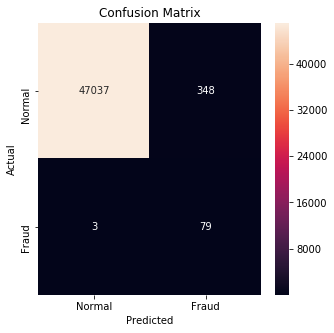

[0.9926053890070997]
[0.18501170960187355]
[0.9634146341463414]
[0.9950979123991036]


In [17]:
#KKN model FOLD 1
##Create list for conacatenate results of accuracy,precision,recall and f1-score
list5=[] #for average
list6=[] #for precision
list7=[] #for recall
list8=[] #f1-score

###Train function
r1_train_m1=r1_train.copy(deep=True)
X1_train=r1_train_m1.drop(["Class"], axis=1).values #Setting the X to do the split
y1_train=r1_train_m1["Class"].values

#from imblearn.over_sampling import SMOTE
smt = SMOTE()
X1_train, y1_train = smt.fit_sample(X1_train, y1_train)
print("No of Valid Trasaction after SMOTE: ",np.count_nonzero(y1_train== 0))
print("No of Fraud Trasaction after SMOTE: ",np.count_nonzero(y1_train== 1))

##Knn model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
model_knn=knn.fit(X1_train, y1_train)


r1_test_m1=r1_test.copy(deep=True)
x1_test=r1_test_m1.drop(["Class"], axis=1).values #Setting the X to do the split
y1_test=r1_test_m1["Class"].values
y_pred = model_knn.predict(x1_test)




#Evaluation metrics
prec= precision_score(y1_test,y_pred)
print("precision: ", prec)
list6.append(prec)
rec= recall_score(y1_test,y_pred)
print("recall: ", rec)
list7.append(rec)
score2 = f1_score(y1_test,y_pred,average='weighted')
print("f1-score: ",score2)
list8.append(score2)
a=accuracy_score(y1_test, y_pred)
print("Accuracy: ",a)
list5.append(a)


#printing confusion matrix
results = confusion_matrix(y1_test, model_knn.predict(x1_test)) 
print ('Confusion Matrix :')
print(results) 




#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
plt.figure(figsize=(5, 5))
sns.heatmap(results, xticklabels=LABELS,yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(list5)
print(list6)
print(list7)
print(list8)

236925
236925
precision:  0.45806451612903226
recall:  0.8658536585365854
f1-score:  0.9983060691617226
Confusion Matrix :
[[47301    84]
 [   11    71]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47385
           1       0.46      0.87      0.60        82

    accuracy                           1.00     47467
   macro avg       0.73      0.93      0.80     47467
weighted avg       1.00      1.00      1.00     47467



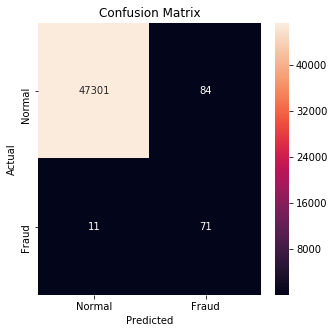

[0.9926053890070997, 0.9979986095603262]
[0.18501170960187355, 0.45806451612903226]
[0.9634146341463414, 0.8658536585365854]
[0.9950979123991036, 0.9983060691617226]


In [18]:
####KNN fold 2
r2_train_m2=r2_train.copy(deep=True)
X2_train=r2_train_m2.drop(["Class"], axis=1).values #Setting the X to do the split
y2_train=r2_train_m2["Class"].values
###SMote function on train function
smt = SMOTE()
X2_train, y2_train = smt.fit_sample(X2_train, y2_train)
print(np.count_nonzero(y2_train== 0))
print(np.count_nonzero(y2_train== 1))

###KNN model fold 2
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
model2_knn=knn.fit(X2_train, y2_train)


r2_test_m1=r2_test.copy(deep=True)
x2_test=r2_test_m1.drop(["Class"], axis=1).values #Setting the X to do the split
y2_test=r2_test_m1["Class"].values
y2_pred = model2_knn.predict(x2_test)

##Accuracy of the fold 2
b=accuracy_score(y2_test, y2_pred)
list5.append(b)

#Evaluation metrics
prec= precision_score(y2_test,y2_pred)
print("precision: ",prec)
list6.append(prec)
rec= recall_score(y2_test,y2_pred)
print("recall: ", rec)
list7.append(rec)
z= f1_score(y2_test,y2_pred,average='weighted')
print("f1-score: ",z)
list8.append(z)

#printing confusion matrix
results = confusion_matrix(y2_test, model2_knn.predict(x2_test)) 
print ('Confusion Matrix :')
print(results) 
print(classification_report(y2_test, model2_knn.predict(x2_test)))

#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
plt.figure(figsize=(5, 5))
sns.heatmap(results, xticklabels=LABELS,yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


print(list5)
print(list6)
print(list7)
print(list8)


236925
236925
precision:  0.5
recall:  0.7317073170731707
f1-score:  0.9984346266857179
Accuracy:  0.9982724840415447
Confusion Matrix :
[[47325    60]
 [   22    60]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47385
           1       0.50      0.73      0.59        82

    accuracy                           1.00     47467
   macro avg       0.75      0.87      0.80     47467
weighted avg       1.00      1.00      1.00     47467



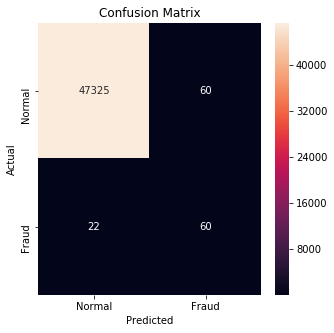

0.9982724840415447
[0.9926053890070997, 0.9979986095603262, 0.9982724840415447]
[0.18501170960187355, 0.45806451612903226, 0.5]
[0.9634146341463414, 0.8658536585365854, 0.7317073170731707]
[0.9950979123991036, 0.9983060691617226, 0.9984346266857179]


In [19]:
#KNN Fold 3
r3_train_m1=r3_train.copy(deep=True)
X3_train=r3_train_m1.drop(["Class"], axis=1).values #Setting the X to do the split
y3_train=r3_train_m1["Class"].values
##Smote function on train data 
smt = SMOTE()
X3_train, y3_train = smt.fit_sample(X3_train, y3_train)
print(np.count_nonzero(y3_train== 0))
print(np.count_nonzero(y3_train== 1))

##KNN model fold 3
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
model3_knn=knn.fit(X3_train, y3_train)

r3_test_m3=r3_test.copy(deep=True)
x3_test=r3_test_m3.drop(["Class"], axis=1).values #Setting the X to do the split
y3_test=r3_test_m3["Class"].values
y3_pred = model3_knn.predict(x3_test)
###Accuracy of the fold 3

#Evaluation metrics
prec= precision_score(y3_test,y3_pred)
print("precision: ",prec)
list6.append(prec)
rec= recall_score(y3_test,y3_pred)
print("recall: ", rec)
list7.append(rec)
z= f1_score(y3_test,y3_pred,average='weighted')
print("f1-score: ",z)
list8.append(z)
c=accuracy_score(y3_test, y3_pred)
list5.append(c)
print("Accuracy: ",c)

#printing confusion matrix
results = confusion_matrix(y3_test, model3_knn.predict(x3_test)) 
print ('Confusion Matrix :')
print(results) 
print(classification_report(y3_test, model3_knn.predict(x3_test)))

#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
plt.figure(figsize=(5, 5))
sns.heatmap(results, xticklabels=LABELS,yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print(c)

print(list5)
print(list6)
print(list7)
print(list8)


236925
236925
precision:  0.12408759124087591
recall:  0.8292682926829268
f1-score:  0.9934160794915392
accuracy:  0.9895927697136958
Confusion Matrix :
[[46905   480]
 [   14    68]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     47385
           1       0.12      0.83      0.22        82

    accuracy                           0.99     47467
   macro avg       0.56      0.91      0.61     47467
weighted avg       1.00      0.99      0.99     47467



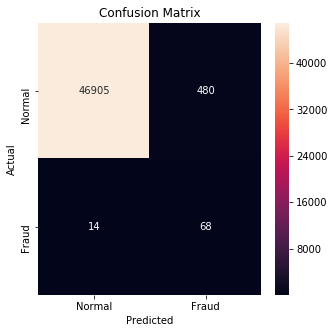

0.9895927697136958
[0.9926053890070997, 0.9979986095603262, 0.9982724840415447, 0.9895927697136958]
[0.18501170960187355, 0.45806451612903226, 0.5, 0.12408759124087591]
[0.9634146341463414, 0.8658536585365854, 0.7317073170731707, 0.8292682926829268]
[0.9950979123991036, 0.9983060691617226, 0.9984346266857179, 0.9934160794915392]


In [20]:
###KNNof the FOld 4
r4_train_m1=r4_train.copy(deep=True)
X4_train=r4_train_m1.drop(["Class"], axis=1).values #Setting the X to do the split
y4_train=r4_train_m1["Class"].values

###Smote function on train data
smt = SMOTE()
X4_train, y4_train = smt.fit_sample(X4_train, y4_train)
print(np.count_nonzero(y4_train== 0))
print(np.count_nonzero(y4_train== 1))

##KNN model fold 4
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
model4_knn=knn.fit(X4_train, y4_train)

r4_test_m1=r4_test.copy(deep=True)
x4_test=r4_test_m1.drop(["Class"], axis=1).values #Setting the X to do the split
y4_test=r4_test_m1["Class"].values
y4_pred = model4_knn.predict(x4_test)

##Accuracy of Fold 4


#Evaluation metrics
prec= precision_score(y4_test,y4_pred)
print("precision: ",prec)
list6.append(prec)
rec= recall_score(y4_test,y4_pred)
print("recall: ", rec)
list7.append(rec)
z= f1_score(y4_test,y4_pred,average='weighted')
print("f1-score: ",z)
list8.append(z)
d=accuracy_score(y4_test, y4_pred)
print("accuracy: ",d)
list5.append(d)

#printing confusion matrix
results = confusion_matrix(y4_test,model4_knn.predict(x4_test)) 
print ('Confusion Matrix :')
print(results) 
print(classification_report(y4_test,model4_knn.predict(x4_test)))

#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
plt.figure(figsize=(5, 5))
sns.heatmap(results, xticklabels=LABELS,yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print(d)

print(list5)
print(list6)
print(list7)
print(list8)

236925
236925
precision:  0.4892086330935252
recall:  0.8292682926829268
f1-score:  0.9984396730611007
Accuracy:  0.9982092822381865
Confusion Matrix :
[[47314    71]
 [   14    68]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47385
           1       0.49      0.83      0.62        82

    accuracy                           1.00     47467
   macro avg       0.74      0.91      0.81     47467
weighted avg       1.00      1.00      1.00     47467



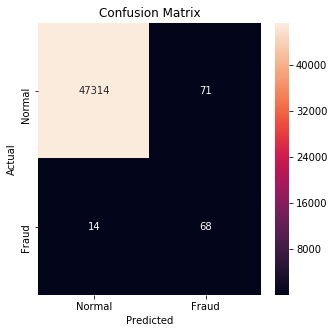

[0.9926053890070997, 0.9979986095603262, 0.9982724840415447, 0.9895927697136958, 0.9982092822381865]
[0.18501170960187355, 0.45806451612903226, 0.5, 0.12408759124087591, 0.4892086330935252]
[0.9634146341463414, 0.8658536585365854, 0.7317073170731707, 0.8292682926829268, 0.8292682926829268]
[0.9950979123991036, 0.9983060691617226, 0.9984346266857179, 0.9934160794915392, 0.9984396730611007]


In [21]:
#KNN of fold 5
r5_train_m1=r5_train.copy(deep=True)
X5_train=r5_train_m1.drop(["Class"], axis=1).values #Setting the X to do the split
y5_train=r5_train_m1["Class"].values

###Smote function on train data
smt = SMOTE()
X5_train, y5_train = smt.fit_sample(X5_train, y5_train)
print(np.count_nonzero(y5_train== 0))
print(np.count_nonzero(y5_train== 1))

##KNN model fold 5
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
model5_knn=knn.fit(X5_train, y5_train)


r5_test_m1=r5_test.copy(deep=True)
x5_test=r5_test_m1.drop(["Class"], axis=1).values #Setting the X to do the split
y5_test=r5_test_m1["Class"].values
y5_pred = model5_knn.predict(x5_test)



#Evaluation metrics
prec= precision_score(y5_test,y5_pred)
print("precision: ",prec)
list6.append(prec)
rec= recall_score(y5_test,y5_pred)
print("recall: ", rec)
list7.append(rec)
z= f1_score(y5_test,y5_pred,average='weighted')
print("f1-score: ",z)
list8.append(z)
e=accuracy_score(y5_test, y5_pred)
print("Accuracy: ",e)
list5.append(e)

#printing confusion matrix
results = confusion_matrix(y5_test, model5_knn.predict(x5_test)) 
print ('Confusion Matrix :')
print(results) 
print(classification_report(y5_test, model5_knn.predict(x5_test)))

#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
plt.figure(figsize=(5, 5))
sns.heatmap(results, xticklabels=LABELS,yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(list5)
print(list6)
print(list7)
print(list8)

236925
236925
precision:  0.6504854368932039
recall:  0.8170731707317073
f1-score:  0.9989864314749174
Accuracy:  0.9989255693429119
Confusion Matrix :
[[47349    36]
 [   15    67]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47385
           1       0.65      0.82      0.72        82

    accuracy                           1.00     47467
   macro avg       0.83      0.91      0.86     47467
weighted avg       1.00      1.00      1.00     47467



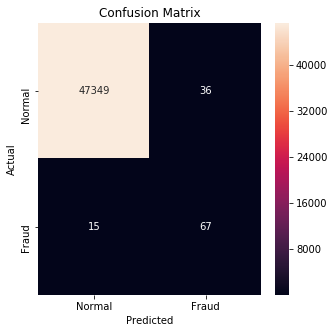

[0.9926053890070997, 0.9979986095603262, 0.9982724840415447, 0.9895927697136958, 0.9982092822381865, 0.9989255693429119]
[0.18501170960187355, 0.45806451612903226, 0.5, 0.12408759124087591, 0.4892086330935252, 0.6504854368932039]
[0.9634146341463414, 0.8658536585365854, 0.7317073170731707, 0.8292682926829268, 0.8292682926829268, 0.8170731707317073]
[0.9950979123991036, 0.9983060691617226, 0.9984346266857179, 0.9934160794915392, 0.9984396730611007, 0.9989864314749174]


In [22]:
###KNN of fold 6
r6_train_m1=r6_train.copy(deep=True)
X6_train=r6_train_m1.drop(["Class"], axis=1).values #Setting the X to do the split
y6_train=r6_train_m1["Class"].values

###Smote function on the train function
smt = SMOTE()
X6_train, y6_train = smt.fit_sample(X6_train, y6_train)
print(np.count_nonzero(y6_train== 0))
print(np.count_nonzero(y6_train== 1))

##KNN model fold 6
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
model6_knn=knn.fit(X6_train, y6_train)

r6_test_m1=r6_test.copy(deep=True)
x6_test=r6_test_m1.drop(["Class"], axis=1).values #Setting the X to do the split
y6_test=r6_test_m1["Class"].values
y6_pred = model6_knn.predict(x6_test)

#Evaluation metrics
prec= precision_score(y6_test,y6_pred)
print("precision: ",prec)
list6.append(prec)
rec= recall_score(y6_test,y6_pred)
print("recall: ", rec)
list7.append(rec)
z= f1_score(y6_test,y6_pred,average='weighted')
print("f1-score: ",z)
list8.append(z)
f=accuracy_score(y6_test, y6_pred)
print("Accuracy: ",f)
list5.append(f)


#printing confusion matrix
results = confusion_matrix(y6_test, model6_knn.predict(x6_test)) 
print ('Confusion Matrix :')
print(results) 
print((classification_report(y6_test, model6_knn.predict(x6_test))))


#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
plt.figure(figsize=(5, 5))
sns.heatmap(results, xticklabels=LABELS,yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(list5)
print(list6)
print(list7)
print(list8)

In [24]:
###KNN Model means of 6 folds ,Final result
from statistics import mean
accuracy=mean(list5)
print("Accuracy of the model is: ",accuracy)
precision=mean(list6)
print("Precision of the model is: ",precision)
recall=mean(list7)
print("Recall of the model is: ",recall)
p=mean(list8)
print("f-1 score of the model is: ",p)

Accuracy of the model is:  0.9959340173172941
Precision of the model is:  0.40114298115975183
Recall of the model is:  0.839430894308943
f-1 score of the model is:  0.9971134653790169
